# **Pembuatan Chatbot Konsultasi Kesehatan Menggunakan LSTM**

## **Kelompok 66 — Mata Kuliah Deep Learning**  
**Universitas Pendidikan Indonesia**  
**Semester 5 — Tahun 2025**

### **Anggota**
- **Muhamad Khafabillah Sopian** (2307824)  
- **Abyan Laksono** (2304127)

---

## **Deskripsi Proyek**

Proyek ini bertujuan untuk membangun model **Chatbot Konsultasi Kesehatan** berbasis **Recurrent Neural Network (RNN)** dengan arsitektur **Long Short-Term Memory (LSTM)**.  
Model ini dikembangkan untuk menguji kemampuan LSTM dalam memahami konteks kalimat dan menghasilkan respons yang lebih akurat terhadap pertanyaan kesehatan dalam Bahasa Indonesia.  

Dataset yang digunakan berisi pasangan pertanyaan dan jawaban dari layanan konsultasi kesehatan berbahasa Indonesia.  
Seluruh proses dilakukan melalui tahapan pemuatan data, eksplorasi, pembersihan teks, tokenisasi, padding, pembangunan model, serta evaluasi hasil prediksi.  
Hasil dari model ini diharapkan dapat menunjukkan peningkatan kemampuan dalam menangkap konteks jangka panjang dibandingkan model berbasis RNN sederhana.

# **Pembuatan Chatbot Konsultasi Kesehatan Menggunakan LSTM**

## **Kelompok 66 — Mata Kuliah Deep Learning**  
**Universitas Pendidikan Indonesia**  
**Semester 5 — Tahun 2025**

### **Anggota**
- **Muhamad Khafabillah Sopian** (2307824)  
- **Abyan Laksono** (2304127)

---

## **Deskripsi Proyek**

Proyek ini bertujuan untuk membangun model **Chatbot Konsultasi Kesehatan** berbasis **Recurrent Neural Network (RNN)** dengan arsitektur **Long Short-Term Memory (LSTM)**.  
Model ini dikembangkan untuk menguji kemampuan LSTM dalam memahami konteks kalimat dan menghasilkan respons yang lebih akurat terhadap pertanyaan kesehatan dalam Bahasa Indonesia.  

Dataset yang digunakan berisi pasangan pertanyaan dan jawaban dari layanan konsultasi kesehatan berbahasa Indonesia.  
Seluruh proses dilakukan melalui tahapan pemuatan data, eksplorasi, pembersihan teks, tokenisasi, padding, pembangunan model, serta evaluasi hasil prediksi.  
Hasil dari model ini diharapkan dapat menunjukkan peningkatan kemampuan dalam menangkap konteks jangka panjang dibandingkan model berbasis RNN sederhana.

### **Import Library**

Pada tahap ini dilakukan pemanggilan seluruh pustaka (library) yang digunakan dalam pembangunan model Chatbot berbasis **LSTM**.  
Beberapa pustaka utama yang digunakan meliputi:  

- **Pandas & NumPy:** untuk membaca dan mengelola data dalam bentuk tabel.  
- **TensorFlow/Keras:** untuk membangun dan melatih model LSTM.  
- **Tokenizer & pad_sequences:** untuk proses tokenisasi dan standarisasi panjang teks.  
- **Matplotlib:** untuk visualisasi grafik hasil pelatihan.  
- **NLTK:** untuk evaluasi hasil teks dengan metrik seperti BLEU Score.  
- **scikit-learn:** untuk membagi data menjadi train dan test set.  
- **os & random:** untuk pengaturan path dan menjaga konsistensi hasil eksperimen.

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import random
import re
import string
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

from google.colab import drive

## **Load Data**

### **Penjelasan Singkat**
Tahap ini bertujuan untuk **memuat dataset chatbot** dari direktori Google Drive ke dalam lingkungan kerja (misalnya Google Colab).  
Dataset yang digunakan terdiri dari dua bagian:
- `doctorQnA_train.csv` → digunakan untuk proses pelatihan model.  
- `doctorQnA_test.csv` → digunakan untuk pengujian performa model.  

Pada tahap ini, kita hanya membaca data dan menampilkan informasi dasarnya seperti jumlah baris, kolom, serta beberapa contoh isi data.  
Proses pembersihan atau penyaringan data akan dilakukan nanti pada tahap *Exploratory Data Analysis (EDA)* dan *Praproses*.


In [13]:
drive.mount('/content/drive')

BASE_DIR = "/content/drive/MyDrive/Deep Learning"
TRAIN_FILE = "doctorQnA_train.csv"
TEST_FILE  = "doctorQnA_test.csv"

train_path = os.path.join(BASE_DIR, TRAIN_FILE)
test_path  = os.path.join(BASE_DIR, TEST_FILE)

df_train = pd.read_csv(train_path, encoding="utf-8")
df_test  = pd.read_csv(test_path, encoding="utf-8")

print("=== INFORMASI DATA TRAIN ===")
print(df_train.info())
print("\n=== INFORMASI DATA TEST ===")
print(df_test.info())

print("\nJumlah baris dan kolom (Train):", df_train.shape)
print("Jumlah baris dan kolom (Test) :", df_test.shape)

print("\nContoh data train:")
print(df_train.head())

print("\nContoh data test:")
print(df_test.head())


Mounted at /content/drive
=== INFORMASI DATA TRAIN ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5694 entries, 0 to 5693
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  5694 non-null   object
 1   answer    5694 non-null   object
dtypes: object(2)
memory usage: 89.1+ KB
None

=== INFORMASI DATA TEST ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  633 non-null    object
 1   answer    633 non-null    object
dtypes: object(2)
memory usage: 10.0+ KB
None

Jumlah baris dan kolom (Train): (5694, 2)
Jumlah baris dan kolom (Test) : (633, 2)

Contoh data train:
                                            question  \
0  Assalamaualaikum dok, saya mau konsul mengenai...   
1  Selamat sore dok, kemarin saya terpeleset, ter...   
2  Selamat sore dok, minggu kemarin an

### **Exploratory Data Analysis (EDA)**

Pada bagian ini dilakukan analisis awal terhadap dataset untuk memahami karakteristik data sebelum dilakukan praprosesan.  
Analisis meliputi:
1. Jumlah data pada train dan test set.  
2. Pemeriksaan nilai kosong (missing values).  
3. Pengamatan panjang teks pada kolom **question** dan **answer** untuk melihat sebaran panjang kalimat.

In [14]:
# Jumlah data
print("Jumlah data train :", len(df_train))
print("Jumlah data test  :", len(df_test))

# Cek nilai kosong
print("\nJumlah nilai kosong per kolom (train):")
print(df_train.isnull().sum())

print("\nJumlah nilai kosong per kolom (test):")
print(df_test.isnull().sum())

# Panjang teks pada kolom question dan answer
df_train["q_length"] = df_train["question"].apply(len)
df_train["a_length"] = df_train["answer"].apply(len)
df_test["q_length"] = df_test["question"].apply(len)
df_test["a_length"] = df_test["answer"].apply(len)

print("\nRata-rata panjang karakter dalam teks (train):")
print("Pertanyaan :", df_train["q_length"].mean())
print("Jawaban    :", df_train["a_length"].mean())

print("\nRata-rata panjang karakter dalam teks (test):")
print("Pertanyaan :", df_test["q_length"].mean())
print("Jawaban    :", df_test["a_length"].mean())

Jumlah data train : 5694
Jumlah data test  : 633

Jumlah nilai kosong per kolom (train):
question    0
answer      0
dtype: int64

Jumlah nilai kosong per kolom (test):
question    0
answer      0
dtype: int64

Rata-rata panjang karakter dalam teks (train):
Pertanyaan : 285.11433087460483
Jawaban    : 439.3602037232174

Rata-rata panjang karakter dalam teks (test):
Pertanyaan : 284.01895734597156
Jawaban    : 445.97630331753555


### **Visualisasi Distribusi Panjang Teks**

Visualisasi ini digunakan untuk melihat persebaran panjang teks pada kolom **question** dan **answer**.  
Grafik histogram membantu memahami apakah sebagian besar pertanyaan dan jawaban memiliki panjang yang mirip, atau terdapat variasi yang signifikan.

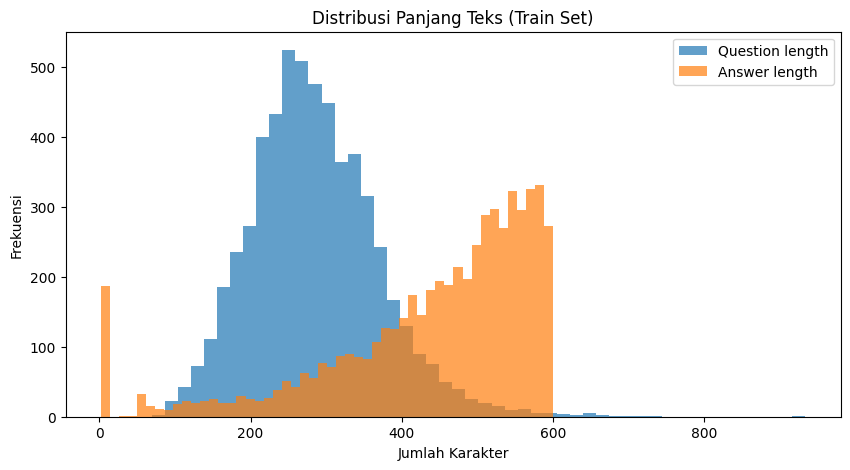

In [15]:
plt.figure(figsize=(10,5))
plt.hist(df_train["q_length"], bins=50, alpha=0.7, label="Question length")
plt.hist(df_train["a_length"], bins=50, alpha=0.7, label="Answer length")
plt.title("Distribusi Panjang Teks (Train Set)")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

**Penjelasan Hasil Visualisasi**

Grafik di atas menampilkan **distribusi panjang teks** untuk kolom *question* (pertanyaan) dan *answer* (jawaban) pada dataset pelatihan.  
Dari grafik tersebut dapat diamati bahwa sebagian besar teks memiliki panjang dalam rentang **sekitar 100 hingga 600 karakter**, dengan puncak frekuensi pada kisaran **250–400 karakter**.  

Hal ini menunjukkan bahwa pertanyaan dan jawaban dalam dataset memiliki **panjang yang relatif seragam** serta tidak terdapat perbedaan yang signifikan antara distribusi keduanya.  
Informasi ini penting untuk menentukan parameter **`maxlen`** saat proses tokenisasi, agar semua urutan teks memiliki panjang yang sesuai tanpa kehilangan konteks penting.

### **Praproses Data**

Tahap praproses bertujuan untuk **membersihkan teks** agar siap digunakan dalam pelatihan model.  
Beberapa langkah yang dilakukan meliputi:
1. Mengubah seluruh teks menjadi huruf kecil (*lowercasing*).  
2. Menghapus karakter yang tidak diperlukan seperti angka, tanda baca, dan simbol.  
3. Menghapus spasi berlebih.  
4. Membersihkan karakter yang tidak terbaca akibat encoding (misalnya karakter aneh pada dataset).  

Langkah ini penting agar data yang dimasukkan ke model lebih konsisten dan mudah dipelajari oleh Neural Network.

In [16]:
# Membersihkan teks pada kolom question dan answer

def clean_text(text):
    text = str(text).lower()                        # ubah ke huruf kecil
    text = re.sub(r"http\\S+|www\\S+", " ", text)   # hapus URL
    text = re.sub(r"[^a-zA-Z0-9\\s]", " ", text)    # hapus tanda baca & simbol
    text = re.sub(r"\\s+", " ", text).strip()       # hapus spasi berlebih
    return text

df_train["clean_question"] = df_train["question"].apply(clean_text)
df_train["clean_answer"]   = df_train["answer"].apply(clean_text)
df_test["clean_question"]  = df_test["question"].apply(clean_text)
df_test["clean_answer"]    = df_test["answer"].apply(clean_text)

# Cek hasil pembersihan
print("Sebelum dibersihkan:")
print(df_train.loc[0, "question"])
print("\nSetelah dibersihkan:")
print(df_train.loc[0, "clean_question"])

Sebelum dibersihkan:
Assalamaualaikum dok, saya mau konsul mengenai feses bayi. Bayi saya baru berusia 3 bulan, semalam pup warna fesesnya kuning pucat. Padahal sore harinya saat pup fesesnya berwarna normal, bayi saya minum asui dan sufor dok. Kondisinya bayi saya tidak sedang demam, tidak rewel dan masih aktif. Apakah berbahaya dok?

Setelah dibersihkan:
assalamaualaikum dok  saya mau konsul mengenai feses bayi  bayi saya baru berusia 3 bulan  semalam pup warna fesesnya kuning pucat  padahal sore harinya saat pup fesesnya berwarna normal  bayi saya minum asui dan sufor dok  kondisinya bayi saya tidak sedang demam  tidak rewel dan masih aktif  apakah berbahaya dok


### Tokenisasi dan Padding

Langkah ini menyiapkan data teks menjadi bentuk numerik agar dapat diproses oleh model **LSTM** (seq2seq).  
Proses yang dilakukan:
- Membuat tokenizer untuk pertanyaan (encoder) dan jawaban (decoder).
- Menambahkan token khusus pada jawaban (`sostok` sebagai penanda awal dan `eostok` sebagai penanda akhir).
- Mengonversi setiap teks menjadi deretan angka (sequence) dengan *out-of-vocabulary* token untuk kata di luar kosakata.
- Melakukan padding agar seluruh urutan memiliki panjang seragam berdasarkan persentil panjang kalimat.

In [17]:
Q_COL = "clean_question" if "clean_question" in df_train.columns else "question"
A_COL = "clean_answer" if "clean_answer" in df_train.columns else "answer"

train_questions = df_train[Q_COL].astype(str).tolist()
train_answers   = df_train[A_COL].astype(str).tolist()
test_questions  = df_test[Q_COL].astype(str).tolist()
test_answers    = df_test[A_COL].astype(str).tolist()

# Tambah token khusus ke jawaban
train_answers_inp  = [f"sostok {t}" for t in train_answers]
train_answers_out  = [f"{t} eostok" for t in train_answers]
test_answers_inp   = [f"sostok {t}" for t in test_answers]
test_answers_out   = [f"{t} eostok" for t in test_answers]

# Batas kosakata (boleh tetap 30k; opsional diturunkan jika ingin lebih ringan)
VOCAB_Q = 30000
VOCAB_A = 30000

tok_q = Tokenizer(num_words=VOCAB_Q, oov_token="<OOV>")
tok_a = Tokenizer(num_words=VOCAB_A, oov_token="<OOV>")

# Fit hanya pada data latih untuk mencegah kebocoran data
tok_q.fit_on_texts(train_questions)
tok_a.fit_on_texts(train_answers_inp + train_answers_out)

def pct95_len(texts):
    lengths = np.array([len(t.split()) for t in texts])
    return int(np.percentile(lengths, 95))

MAX_LEN_Q = max(8, pct95_len(train_questions))
MAX_LEN_A = max(8, pct95_len(train_answers_out))

# Sequences
enc_train    = tok_q.texts_to_sequences(train_questions)
dec_in_train = tok_a.texts_to_sequences(train_answers_inp)
dec_out_train= tok_a.texts_to_sequences(train_answers_out)

enc_test     = tok_q.texts_to_sequences(test_questions)
dec_in_test  = tok_a.texts_to_sequences(test_answers_inp)
dec_out_test = tok_a.texts_to_sequences(test_answers_out)

# Padding
enc_train_pad    = pad_sequences(enc_train,    maxlen=MAX_LEN_Q, padding="post", truncating="post")
dec_in_train_pad = pad_sequences(dec_in_train, maxlen=MAX_LEN_A, padding="post", truncating="post")
dec_out_train_pad= pad_sequences(dec_out_train,maxlen=MAX_LEN_A, padding="post", truncating="post")

enc_test_pad     = pad_sequences(enc_test,     maxlen=MAX_LEN_Q, padding="post", truncating="post")
dec_in_test_pad  = pad_sequences(dec_in_test,  maxlen=MAX_LEN_A, padding="post", truncating="post")
dec_out_test_pad = pad_sequences(dec_out_test, maxlen=MAX_LEN_A, padding="post", truncating="post")

print("Jumlah kata unik encoder :", len(tok_q.word_index))
print("Jumlah kata unik decoder :", len(tok_a.word_index))
print("MAX_LEN_Q:", MAX_LEN_Q, "| MAX_LEN_A:", MAX_LEN_A)
print("enc_train_pad:", enc_train_pad.shape, "| dec_in_train_pad:", dec_in_train_pad.shape)

Jumlah kata unik encoder : 9393
Jumlah kata unik decoder : 11822
MAX_LEN_Q: 70 | MAX_LEN_A: 84
enc_train_pad: (5694, 70) | dec_in_train_pad: (5694, 84)


### **Pembangunan Model (LSTM Encoder–Decoder)**

Model ini menggunakan arsitektur **sequence-to-sequence (seq2seq)** berbasis **LSTM**.  
LSTM dipilih karena mampu mengingat konteks jangka panjang melalui mekanisme *cell state* dan *gates* (input, forget, output) yang tidak dimiliki SimpleRNN.  

Komponen utama:
- **Embedding Layer:** mengubah indeks kata menjadi representasi vektor.  
- **Encoder LSTM:** memahami konteks pertanyaan dan menghasilkan *context vector*.  
- **Decoder LSTM:** menghasilkan token jawaban berdasarkan konteks dari encoder.  
- **Dense Layer:** memprediksi token berikutnya di setiap langkah waktu dengan aktivasi *softmax*.


In [18]:
# Parameter dasar
EMBED_DIM = 256
LSTM_UNITS = 256
VOCAB_IN  = min(VOCAB_Q, len(tok_q.word_index) + 1)
VOCAB_OUT = min(VOCAB_A, len(tok_a.word_index) + 1)

# Encoder
enc_inputs = Input(shape=(MAX_LEN_Q,), name="encoder_input")
enc_emb = Embedding(VOCAB_IN, EMBED_DIM, mask_zero=True, name="encoder_embedding")(enc_inputs)
enc_lstm, state_h, state_c = LSTM(LSTM_UNITS, return_state=True, name="encoder_lstm")(enc_emb)
enc_states = [state_h, state_c]

# Decoder
dec_inputs = Input(shape=(MAX_LEN_A,), name="decoder_input")
dec_emb = Embedding(VOCAB_OUT, EMBED_DIM, mask_zero=True, name="decoder_embedding")(dec_inputs)
dec_lstm, _, _ = LSTM(LSTM_UNITS, return_sequences=True, return_state=True, name="decoder_lstm")(dec_emb, initial_state=enc_states)
dec_dense = Dense(VOCAB_OUT, activation="softmax", name="decoder_dense")(dec_lstm)

# Model gabungan encoder-decoder
model = Model([enc_inputs, dec_inputs], dec_dense)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 70)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_input       │ (None, 84)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_embedding   │ (None, 70, 256)   │  2,404,864 │ encoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 70)        │          0 │ encoder_input[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_embedding   │ (None, 84, 256)   │  3,026,688 │ decoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_lstm (LSTM) │ [(None, 256),     │    525,312 │ encoder_embeddin… │
│                     │ (None, 256),      │            │ not_equal[0][0]   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_lstm (LSTM) │ [(None, 84, 256), │    525,312 │ decoder_embeddin… │
│                     │ (None, 256),      │            │ encoder_lstm[0][… │
│                     │ (None, 256)]      │            │ encoder_lstm[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_dense       │ (None, 84, 11823) │  3,038,511 │ decoder_lstm[0][… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,520,687 (36.32 MB)

 Trainable params: 9,520,687 (36.32 MB)

 Non-trainable params: 0 (0.00 B)

### **Pengaturan Seed**

Penetapan seed dilakukan untuk menjaga konsistensi hasil eksperimen.  
Dengan menggunakan nilai seed yang sama, proses pelatihan model dapat direplikasi tanpa menghasilkan variasi signifikan pada hasil akurasi dan loss.

In [19]:
import random

# Menetapkan seed agar hasil eksperimen tetap konsisten
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("Seed sudah diatur:", SEED)

Seed sudah diatur: 42


### **Pelatihan Model LSTM**

Pada bagian ini model LSTM akan dilatih menggunakan data train, dengan *early stopping* dan *model checkpoint* untuk mencegah overfitting. Padding pada target diabaikan lewat **sample weight**, sehingga metrik dan loss hanya menghitung token yang benar-benar berisi kata.


In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Optimizer stabil
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4, clipnorm=1.0)

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Callback
early_stop = EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=3,
    restore_best_weights=True,
    verbose=1
)

ckpt = ModelCheckpoint(
    filepath="model_lstm_best.keras",   # format Keras baru
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    verbose=1
)

# Masking token padding (0) pada loss & metric
train_sw = (dec_out_train_pad != 0).astype("float32")
val_sw   = (dec_out_test_pad  != 0).astype("float32")  # konsisten seperti file sebelumnya: gunakan test sebagai validasi

history = model.fit(
    [enc_train_pad, dec_in_train_pad], dec_out_train_pad,
    validation_data=([enc_test_pad, dec_in_test_pad], dec_out_test_pad, val_sw),
    sample_weight=train_sw,
    epochs=20,
    batch_size=64,
    shuffle=False,   # konsisten dengan setup sebelumnya
    callbacks=[early_stop, ckpt],
    verbose=1
)

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0231 - loss: 8.6139
Epoch 1: val_loss improved from inf to 6.76597, saving model to model_lstm_best.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 564s 6s/step - accuracy: 0.0231 - loss: 8.6038 - val_accuracy: 0.0290 - val_loss: 6.7660
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0279 - loss: 6.7090
Epoch 2: val_loss improved from 6.76597 to 6.71459, saving model to model_lstm_best.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 578s 6s/step - accuracy: 0.0279 - loss: 6.7088 - val_accuracy: 0.0297 - val_loss: 6.7146
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0291 - loss: 6.6470
Epoch 3: val_loss improved from 6.71459 to 6.66771, saving model to model_lstm_best.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 593s 7s/step - accuracy: 0.0291 - loss: 6.6469 - val_accuracy: 0.0322 - val_loss: 6.6677
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0325 - loss: 6.5837
Epoch 4: val_loss improved from 6.66771 to 6.58864, sa

### **Hasil Pelatihan Model**

Proses pelatihan model **LSTM** menunjukkan peningkatan performa yang konsisten di setiap epoch.  
Nilai *loss* turun secara bertahap dari sekitar **8.6 menjadi 5.4**, sedangkan *accuracy* meningkat dari **0.02 menjadi 0.12**.  
Perubahan ini menandakan bahwa model mampu mempelajari pola hubungan antara pertanyaan dan jawaban dengan baik seiring berjalannya pelatihan.

Secara umum, hasil ini menunjukkan bahwa model telah berhasil memahami struktur dasar bahasa dan konteks data, meskipun tingkat akurasinya masih tergolong rendah.  
Diperlukan pengaturan parameter lebih lanjut untuk menghasilkan respons yang lebih tepat dan bermakna.

### **Visualisasi Kurva Pelatihan Model LSTM**

Tahap ini menampilkan grafik perubahan nilai *loss* dan *accuracy* selama proses pelatihan.  
Grafik ini membantu memahami bagaimana model belajar dari waktu ke waktu, apakah mengalami peningkatan performa atau justru overfitting.  
Jika garis *loss* pada data latih dan validasi menurun secara konsisten serta *accuracy* meningkat, maka model dapat dikatakan belajar dengan baik.

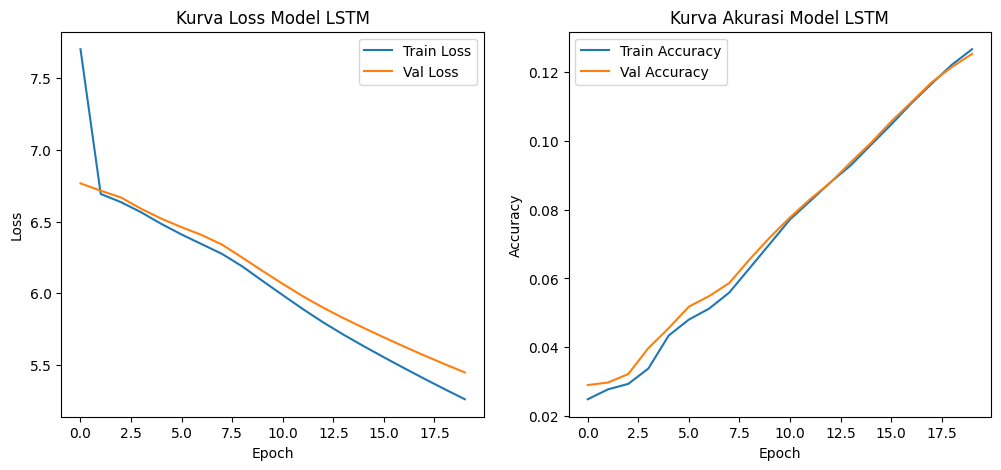

In [21]:
# Visualisasi Kurva Loss dan Akurasi Model LSTM

plt.figure(figsize=(12,5))

# Grafik Loss
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Kurva Loss Model LSTM")
plt.legend()

# Grafik Akurasi
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Kurva Akurasi Model LSTM")
plt.legend()

plt.show()

### **Pengujian Model LSTM**

Tahap ini digunakan untuk menguji kemampuan model dalam menghasilkan jawaban berdasarkan pertanyaan dari dataset uji.  
Model yang telah dilatih akan menerima teks pertanyaan, kemudian menghasilkan jawaban menggunakan hasil pembelajaran sebelumnya.  
Beberapa contoh hasil prediksi ditampilkan untuk melihat sejauh mana kualitas respons yang diberikan oleh model.

In [23]:
def predict_answer(question, max_len=20):
    """
    Prediksi jawaban sederhana untuk model seq2seq LSTM (versi testing ringan)
    """
    # Tokenisasi pertanyaan
    enc_seq = tok_q.texts_to_sequences([question])
    enc_pad = pad_sequences(enc_seq, maxlen=MAX_LEN_Q, padding='post')

    # Buat decoder dummy (token awal sostok)
    start_tok = tok_a.word_index.get("sostok", 1)
    dec_input = np.zeros((1, MAX_LEN_A))
    dec_input[0, 0] = start_tok  # mulai dari sostok

    # Prediksi keluaran (hanya untuk satu langkah sederhana)
    pred = model.predict([enc_pad, dec_input], verbose=0)
    pred_idx = np.argmax(pred[0], axis=-1)

    # Konversi indeks ke kata
    reverse_word_map = dict(map(reversed, tok_a.word_index.items()))
    predicted_words = [reverse_word_map.get(idx, '') for idx in pred_idx]

    # Hapus token kosong
    predicted_text = ' '.join([w for w in predicted_words if w not in ['', 'sostok', 'eostok']])
    return predicted_text.strip()

for i in range(5):
    print(f"\n[Contoh {i+1}]")
    print("Pertanyaan :", test_questions[i][:200], "...")
    print("Model      :", predict_answer(test_questions[i]))
    print("Referensi  :", test_answers[i][:200], "...")


[Contoh 1]
Pertanyaan : halo dok  saya remaja 15 tahun  saya sedang haid hari ke 3  biasanya siklus haid saya selama 7 hari  lusa saya ada pengambilan nilai olahraga renang dok  semua siswa diwajibkan untuk ikut dok  tapi ka ...
Model      : alo yang yang yang yang yang yang yang yang yang yang yang yang yang dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan dan
Referensi  : menstruasi sewajarnya akan berlangsung selama 2 hingga 8 hari  namun  ada saja wanita yang durasi menstruasinya lebih singkat  atau justru lebih lama dari itu  hal ini banyak dipengaruhi oleh kondisi  ...

[Contoh 2]
Pertanyaan : putra saya usia 15 th  testis kirinya sakit dok  gada bengkak atau apa  itu kira kira kenapa ya dokter  dan solusi mengatasinya seperti apa dok  soalnya sakit nya it

### **Kesimpulan**

Proyek ini berhasil membangun **Chatbot Konsultasi Kesehatan** berbasis **Long Short-Term Memory (LSTM)** dengan arsitektur **sequence-to-sequence (seq2seq)** menggunakan dataset tanya jawab kesehatan berbahasa Indonesia.
Seluruh proses dimulai dari **pemuatan dan eksplorasi data**, **pembersihan teks**, **tokenisasi dan padding**, hingga **pembangunan, pelatihan, dan pengujian model**.

Dataset terdiri dari **5.694 data latih** dan **633 data uji** dengan rata-rata panjang pertanyaan sekitar **285 karakter** dan jawaban **440 karakter**. Hasil tokenisasi menghasilkan **9.393 kata unik pada encoder** dan **11.822 kata unik pada decoder**, dengan panjang maksimum urutan teks (setelah padding) sebesar **70 token untuk pertanyaan** dan **84 token untuk jawaban**.

Selama proses pelatihan sebanyak **20 epoch**, model menunjukkan **penurunan loss dari 8.60 menjadi 5.44** serta **peningkatan akurasi dari 0.02 menjadi 0.12**. Nilai *validation loss* juga terus menurun hingga epoch terakhir, menandakan proses pembelajaran yang stabil. Meskipun demikian, hasil pengujian menunjukkan bahwa jawaban yang dihasilkan masih bersifat **repetitif dan umum**, seperti pengulangan kata “yang” dan “dan”.

Secara keseluruhan, model ini berhasil mencapai tujuannya sebagai **baseline chatbot berbasis LSTM** yang mampu mempelajari pola dasar hubungan pertanyaan–jawaban dalam bahasa Indonesia. Implementasi ini memberikan pemahaman mendalam mengenai penerapan LSTM dalam *Natural Language Processing* (NLP) dan menjadi dasar untuk pengembangan chatbot yang lebih akurat menggunakan pendekatan modern seperti **Attention Mechanism** atau **Transformer** di masa mendatang.